In [62]:
import os
import numpy as np
import re
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils

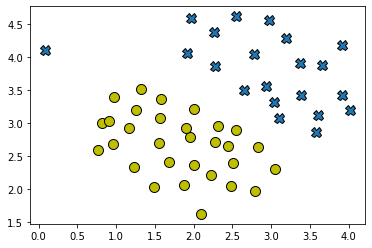

In [3]:
# Load from ex6data1
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('../../Exercise6/Data', 'ex6data1.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

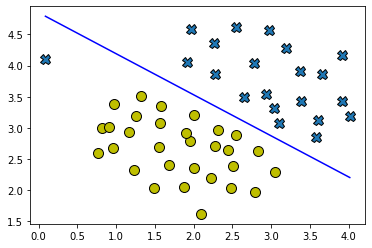

In [9]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

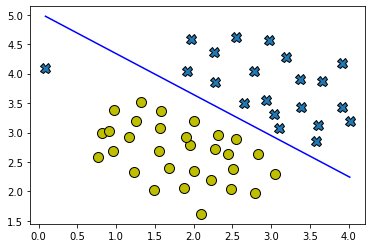

In [8]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 0.1

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

In [11]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    # ====================== YOUR CODE HERE ======================
    
    v = x1 - x2
    sim = np.exp(-np.dot(v,v)/(2*sigma**2)) # norm-squared of v (don't use transpose cause numpy calculates ok w/o it)
                 
    # =============================================================
    return sim

In [12]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



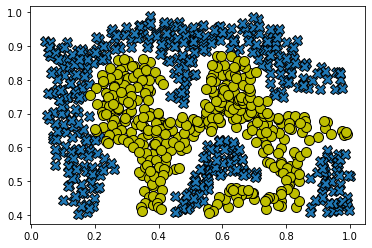

In [14]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('../../Exercise6/Data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

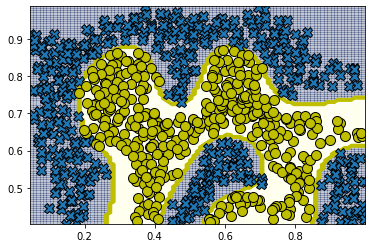

In [15]:
# SVM Parameters
C = 1
sigma = 0.1

model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)

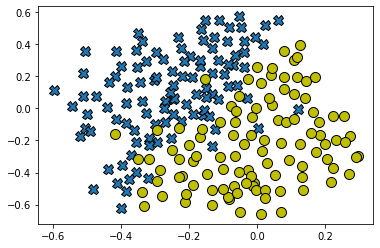

In [16]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat(os.path.join('../../Exercise6/Data', 'ex6data3.mat'))
X, y, Xval, yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
utils.plotData(X, y)

In [22]:
predictions = utils.svmPredict(model, Xval)
print(predictions)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
print(yval)

[0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0]


In [55]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    
    Parameters
    ----------
    X : array_like
        (m x n) matrix of training data where m is number of training examples, and 
        n is the number of features.
    
    y : array_like
        (m, ) vector of labels for ther training data.
    
    Xval : array_like
        (mv x n) matrix of validation data where mv is the number of validation examples
        and n is the number of features
    
    yval : array_like
        (mv, ) vector of labels for the validation data.
    
    Returns
    -------
    C, sigma : float, float
        The best performing values for the regularization parameter C and 
        RBF parameter sigma.
    
    Instructions
    ------------
    Fill in this function to return the optimal C and sigma learning 
    parameters found using the cross validation set.
    You can use `svmPredict` to predict the labels on the cross
    validation set. For example, 
    
        predictions = svmPredict(model, Xval)

    will return the predictions on the cross validation set.
    
    Note
    ----
    You can compute the prediction error using 
    
        np.mean(predictions != yval)
    """
    # You need to return the following variables correctly.
    C = 1
    sigma = 0.3

    # ====================== YOUR CODE HERE ======================
    
    var_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    
    for i, C_run in enumerate(var_vals):
        for j, sigma_run in enumerate(var_vals):
            model = utils.svmTrain(X, y, C_run, gaussianKernel, args=(sigma_run,))
            predictions = utils.svmPredict(model, Xval)
            run_error = np.mean(predictions != yval)
            #print(C_run, sigma_run, run_error, "\n")
            
            if (i == 0 and j == 0):
                final_error = run_error
            elif run_error < final_error:
                final_error = run_error
                C = C_run
                sigma = sigma_run
                #print("Best: ", C, sigma, run_error, "\n \n")
    
    # ============================================================
    return C, sigma

In [56]:
#dataset3Params(X, y, Xval, yval)

0.3 0.1


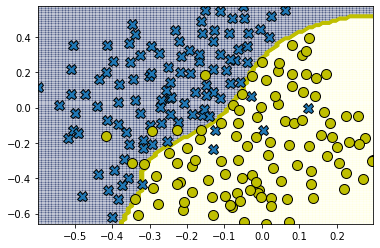

In [57]:
# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
# model = utils.svmTrain(X, y, C, lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print(C, sigma)